In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/raw/Bank/Bank Customer Churn Prediction.csv')
df = df.drop(columns=['customer_id'])

In [62]:
al = len(df[(df.country=='France')])
churn = len(df[(df.country=='France')&(df.churn==1)])

print(churn/al)

0.16154766653370561


In [63]:
al = len(df[(df.country=='Germany')])
churn = len(df[(df.country=='Germany')&(df.churn==1)])

print(churn/al)

0.32443204463929853


In [64]:
al = len(df[(df.country=='Spain')])
churn = len(df[(df.country=='Spain')&(df.churn==1)])

print(churn/al)

0.1667339523617279


In [70]:
df.groupby('gender')['churn'].sum()

gender
Female    1139
Male       898
Name: churn, dtype: int64

In [74]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [75]:
df['credit_card'].value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

In [14]:
df_train, df_test = train_test_split(df, random_state=42, stratify=df['churn'], train_size=0.8)

In [15]:
X_train, y_train = df_train.drop(columns=['churn']), df_train.churn
X_test, y_test = df_test.drop(columns=['churn']), df_test.churn

In [20]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
from catboost import CatBoostClassifier

cf = ['country', 'gender', 'active_member']

clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    cat_features=cf
)


In [33]:
clf.fit(X_train, y_train)

0:	learn: 0.6156629	total: 19.7ms	remaining: 9.81s
1:	learn: 0.5538832	total: 42.2ms	remaining: 10.5s
2:	learn: 0.5102180	total: 63.3ms	remaining: 10.5s
3:	learn: 0.4813830	total: 83ms	remaining: 10.3s
4:	learn: 0.4555145	total: 104ms	remaining: 10.3s
5:	learn: 0.4312614	total: 125ms	remaining: 10.3s
6:	learn: 0.4183594	total: 142ms	remaining: 10s
7:	learn: 0.4068682	total: 159ms	remaining: 9.76s
8:	learn: 0.3925524	total: 177ms	remaining: 9.67s
9:	learn: 0.3817862	total: 194ms	remaining: 9.52s
10:	learn: 0.3756502	total: 204ms	remaining: 9.09s
11:	learn: 0.3694503	total: 213ms	remaining: 8.66s
12:	learn: 0.3626884	total: 220ms	remaining: 8.25s
13:	learn: 0.3593361	total: 227ms	remaining: 7.89s
14:	learn: 0.3573307	total: 232ms	remaining: 7.5s
15:	learn: 0.3530870	total: 238ms	remaining: 7.21s
16:	learn: 0.3494552	total: 245ms	remaining: 6.95s
17:	learn: 0.3469804	total: 252ms	remaining: 6.74s
18:	learn: 0.3446733	total: 258ms	remaining: 6.53s
19:	learn: 0.3417752	total: 265ms	remainin

In [34]:
y_test_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred)

0.7117579829444236

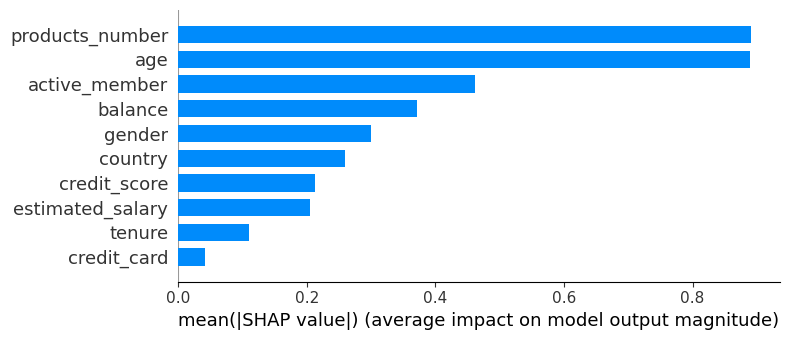

In [36]:
import shap

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size= 0.2)